# Recurrent Neural Networks
_Sentiment analysis through Recurrent Neural Networks_

---

In this tutorial, we are interested in the problem of sentiment analysis. In the first part, we will build a recurrent network on a toy dataset from scratch to determine if a sentence is positive or negative. In a second step, using the [`Keras`](https://keras.io/) API, we will build a network able to determine if a movie review is positive or negative.

---

In [3]:
import numpy as np
import pandas as pd
import numpy.random as rd
import matplotlib.pyplot as plt
import random

---
# PART I: RNN from Scratch

In order to understand recurrent networks in more detail, our first example will be implementing a network from scratch. The network will perform a (simple) sentiment analysis task, namely determining whether a given text string is positive or negative.


## Pre-Processing

The commands below allow displaying some samples of our toy dataset.

In [2]:
from data import train_data, test_data

list(train_data.items())[:15]

[('good', True),
 ('bad', False),
 ('happy', True),
 ('sad', False),
 ('not good', False),
 ('not bad', True),
 ('not happy', False),
 ('not sad', True),
 ('very good', True),
 ('very bad', False),
 ('very happy', True),
 ('very sad', False),
 ('i am happy', True),
 ('this is good', True),
 ('i am bad', False)]

### Data Visualization

In order to visualize quickly the labels, we want display in _green_ the <span style="color:green">positive sentences</span>, and in _red_ the <span style="color:orangered">negative sentences</span>.

In [4]:
from colorama import Fore

In [12]:
list(train_data.keys())[0]

'good'

In [20]:
train_data['good']

True

In [17]:

print(Fore.GREEN + list(train_data.item())[])

TypeError: can only concatenate str (not "list") to str

##### <span style="color:purple">**Todo:** Using the command `Fore.COLOR` of the package [`colorama`](https://pypi.org/project/colorama/), realize such a function.</span>


In [37]:
### TO BE COMPLETED ### 

def coloredSentences(sentences, out=15):
    """
    Display in green the positive sentences, and in red the negative sentences
    - sentences is a dict
        - sentences.keys() are the sentences to display
        - sentences.values() are booleans that encode the sentiment
    - out is an integer indicating the maximum number of sentences to display
    """
    for txt in list(sentences.keys())[:out]:
        if sentences[txt] == True:
            print(Fore.GREEN + txt)
        else:
            print(Fore.RED + txt)

In [ ]:
# %load solutions/scratch/coloredSentences.py

In [38]:
coloredSentences(train_data)

good
bad
happy
sad
not good
not bad
not happy
not sad
very good
very bad
very happy
very sad
i am happy
this is good
i am bad


### Vocabulary

The datasets consists of two $\texttt{dictionaries}$. Before trying to classify these sentences, we will build a vocabulary of all of all words that exist in our data

##### <span style="color:purple">**Question:** How many different words are in our vocabulary?</span>

To answer this question, start by building a **vocabulary**, _i.e._ a $\texttt{list}$ containing all the words used in the dataset. _Each word should occur only once_.

<!-- 18 unique words found -->

In [42]:
### TO BE COMPLETED ### 

# il faut séparer chaque mot individuellement pour le vocabulaire
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
vocab_size = len(vocab)

print('%d unique words found' % vocab_size)

18 unique words found


In [43]:
# %load solutions/scratch/vocab_size.py

### Word Encoding

A neural network cannot take strings as input. So we have to encode these sentences in a format understandable by a computer.

##### <span style="color:purple">**Todo:** Assign an integer index to represent each word of the vocab</span>

To do that, construct two $\texttt{dictionaries}$ allowing to translate words into integer indices, and vice versa :

* $\texttt{word_to_idx}$ has for keys the words of the vocabulary; and for value an integer index, the order in which the words appear in the vocabulary for example.
* $\texttt{idx_to_word}$ performs the opposite translation: its keys are the integer indices while its values are the associated words.

In [55]:
### TO BE COMPLETED ### 

idx = np.arange(0,vocab_size)
word_to_idx = {}
idx_to_word = {}
for i in idx : 
    word_to_idx[vocab[i]]=i
    idx_to_word[i] = vocab[i]

print(word_to_idx['good'])
print(idx_to_word[0])

5
happy


In [ ]:
# %load solutions/scratch/decode.py

This way of encoding words works quite well. However, it has the disadvantage of introducing a preferential but meaningless order in how words are processed. Since the vocabulary size is reasonable, we will use a one-hot encoding instead.

##### <span style="color:purple">**Todo:** Write a function $\texttt{createInputs}$ that performs one-hot encoding</span>

This function will return a $\texttt{list}$ of the one-hot encodings of each word that compose the input sentence.

In [71]:
### TO BE COMPLETED ### 

def createInputs2(text):
    '''
    Returns an array of one-hot vectors representing the words in the input text string.
    - text is a string
    - Each one-hot vector has shape (vocab_size, 1)
    '''
    # découpe le texte en mots individuels
    text_words = [t for t in text.split(' ')]
    text_size = len(text_words)
    
    oneHotMat = np.zeros((vocab_size,text_size))
    
    for col in range(text_size) :
        ligne = word_to_idx[text_words[col]]
        oneHotMat[ligne,col]=1
    
    return oneHotMat

# on a fait une matrice, la structure qu'ils ont fait est une liste de vecteurs.

In [75]:
# %load solutions/scratch/createInputs.py
def createInputs(text):
    '''
    Returns an array of one-hot vectors representing the words in the input text string.
    - text is a string
    - Each one-hot vector has shape (vocab_size, 1)
    '''
    inputs = []
    for w in text.split(' '):
        v = np.zeros((vocab_size, 1))
        v[word_to_idx[w]] = 1
        inputs.append(v)
    return inputs

In [82]:
createInputs('i am very good')

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],


## The Forward Phase

In this part, we will build the simplest possible recursive network. To do so, we will create an $\texttt{RNN}$ class that we will update as we build it. We want to classify a textual data. To do so, we will use a many-to-one network, as shown in the figure below.

<img src="./img/many-to-one.png" width=250>

Let a sentence $x=(x_0,\ldots,x_n)$, its label $y$, and let $h=(h_0,\ldots,h_n)$ be the corresponding hidden state. We give ourselves three weight matrices, $W_{xh}$, $W_{hh}$ and $W_{hy}$, and two bias vectors, $b_h$ and $b_y$, so that, for any $t\in[\![0,n]\!]$:

$$ \left\{\begin{aligned}
    h_t &= \tanh\left( W_{xh}x_t + W_{hh}h_{t-1} + b_h \right) \\
    y &= W_{hy}h_n + b_y
\end{aligned}\right. $$

##### <span style="color:purple">**Question:** What is the dimension of the different weight matrices and bias vectors?</span>

You can freely use the following notations:
* $n_h$ denotes the $\texttt{hidden_size}$, _i.e._ the size oh the hidden vectors $h_t$;
* $n_x$ denotes the $\texttt{input_size}$, _i.e._ the size of the inputs $x_t$;
* $n_y$ denotes the $\texttt{output_size}$, _i.e._ the size of the output $y$.

Les tailles sont : 
* $Wxh = (n_h,n_x)$
* $Whh = (n_h,n_h)$
* $Why = (n_y,n_h)$

**Answer:**

<span style="color:teal ">[Solution]</span>

 **Solution**:
* $W_{xh}\in\mathcal{M}_{n_h,n_x}(\mathbb{R})$
* $W_{hh}\in\mathcal{M}_{n_h,n_h}(\mathbb{R})$
* $W_{hy}\in\mathcal{M}_{n_y,n_h}(\mathbb{R})$
* $b_h\in\mathcal{M}_{n_h,1}(\mathbb{R})$
* $b_y\in\mathcal{M}_{n_y,1}(\mathbb{R})$ 

##### <span style="color:purple">**Todo:** Initialize the weight matrices and bias vectors. Realize the forward pass.</span>

* The weights are initialized from the standard normal distribution, dividing by 1000 to reduce the initial variance. The biases are initialized to zero. 
* For the forward pass, first initialize the hidden state $h_0$ to zero, then perform each step of the RNN.

**Note:** As said, dividing by 1000 the weights reduce the initial variance. This is not the best way to initialize weights, but it's simple and works for this simple example.

**Remark:** Before looking at the solution, you can test your $\texttt{RNN}$ class by passing any input into the network. See below.

In [89]:
# %load solutions/scratch/RNN_v1.py
class RNN:
    # A Vanilla Recurrent Neural Network.

    def __init__(self, input_size, output_size, hidden_size=64):
        # Weights
        
        # initialisation aléatoire des poids avec de petites valeurs. 
        # pour éviter une trop grande variance au début.
        self.Whh = rd.randn(hidden_size, hidden_size) / 1000
        self.Wxh = rd.randn(hidden_size, input_size) / 1000
        self.Why = rd.randn(output_size, hidden_size) / 1000

        # Biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
    
    # ----- #

    def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is a list of one-hot vectors with shape (input_size, 1).
        '''
        # inputs = (x_0,...,X_n) 
        
        h = np.zeros((self.Whh.shape[0], 1)) #vecteur h_t de taille n_h*1

        # Perform each step of the RNN
        # on parcourt toutes les entrées (x_0,...,x_t,...,X_n) 
        # et on calcule le h_t associé à chaque x_t.
        # Mais, on a pas besoin de stocker tous les h_t on  a juste besoin de h_n
        # donc on réutilise le même vecteur h qu'on met à jour dans la boucle for 
        for x in inputs:
            h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)

        # Compute the output
        # on calcule la sortie où h = h_n ici
        y = self.Why @ h + self.by

        return y, h

The binary classification is performed using the $\texttt{softmax}$ function.

##### <span style="color:purple">**Todo:** Implement the softmax function.</span>

As a reminder, for $x=(x_0,\ldots,x_n)$ and $i_0\in[\![0,n]\!]$, $~softmax(x_{i_0}) = \frac{e^{x_{i_0}}}{\sum_i e^{x_i}}$.

In [91]:
def softmax(x):
    # Applies the Softmax function to the input array.
    sum_S = np.sum(np.exp(x))
    S = np.exp(x)/sum_S
    return S

In [ ]:
# %load solutions/scratch/softmax.py

To ensure that we have not made an implementation error, we can pass a sentence from the training set through the network. Since the network has not yet been trained, we should find that this sentence is as likely to be positive as negative, i.e., a probability vector approximately equal to [0.5, 0.5].

In [92]:
# Initialize the RNN
rnn = RNN(vocab_size, 2)

inputs = createInputs('i am very good')
out, _ = rnn.forward(inputs)

probs = softmax(out)
print(probs)

[[0.49999759]
 [0.50000241]]


In [95]:
np.argmax(probs)

1

## The Backward Phase

Lets move on to training. To this end, we first need a loss function. We will use the cross-entropy loss, which is often associated with the $softmax$ function. Let $\sigma$ denotes the $softmax$ function and $y_c$ be the _correct_ class. Then:

$$ \mathcal{L} = \mathcal{L}(x,y;W_{xh},W_{hh},W_{hy},b_h,b_y) = -\log(p_c) \qquad\text{where}\qquad p_c = \sigma(y_c) \,. $$


##### <span style="color:purple">**Exercise:** Prove that for all $i\in\{0,1\}$, $\displaystyle\quad\frac{\partial\mathcal{L}}{\partial y_i} = \left\{\begin{aligned}
    &p_i=\sigma(y_i) & \text{if}\quad c\neq i\\
    &p_c-1=\sigma(y_c)-1 & \text{if}\quad c=i
\end{aligned}\right. $</span>

**Answer:**

<span style="color:teal ">[Solution]</span>

**Solution**: $\mathcal{L}(y_i)=-\log(\sigma(y_c))$. Hence, $\displaystyle\frac{\partial\mathcal{L}}{\partial y_i}=-\frac1{\sigma(y_c)}\times\frac{\partial\sigma}{\partial y_i}$.
* If $i\neq c$,
$$ \frac{\partial\sigma}{\partial y_i} = \frac{ -e^{y_c}\times e^{y_i} }{ \left(\sum_ke^{y_k}\right)^2 }
    = \frac{-e^{y_c}}{\sum_ke^{y_k}}\times\frac{e^{y_i}}{\sum_ke^{y_k}} = -\sigma(y_c)\times\sigma(y_i) 
    \qquad\text{and}\qquad
   \frac{\partial\mathcal{L}}{\partial y_i} = -\frac{-\sigma(y_c)\times\sigma(y_i)}{\sigma(y_c)} = \sigma(y_i)=p_i \,. $$

* Else,
$$ \frac{\partial\sigma}{\partial y_c} = \frac{ e^{y_c}\left(\sum_ke^{y_k}\right)-e^{y_c}\times e^{y_c} }{ \left(\sum_ke^{y_k}\right)^2 }
    = \frac{e^{y_c}}{\sum_ke^{y_k}}-\left(\frac{e^{y_c}}{\sum_ke^{y_k}}\right)^2 = \sigma(y_c)-\sigma(y_c)^2 
    \qquad\text{and}\qquad
   \frac{\partial\mathcal{L}}{\partial y_c} = -\frac{\sigma(y_c)-\sigma(y_c)^2}{\sigma(y_c)} = \sigma(y_c)-1=p_c-1 \,. $$

Let us modify the $\texttt{forward}$ function in the $\texttt{RNN}$ class to cache (= enregistrer) the hidden states $h$ and the inputs $x$, which we will need for computing the gradients in the back-propagation.

In [93]:
class RNN:
    # A Vanilla Recurrent Neural Network.

    def __init__(self, input_size, output_size, hidden_size=64):
        # Weights
        self.Whh = rd.randn(hidden_size, hidden_size) / 1000
        self.Wxh = rd.randn(hidden_size, input_size) / 1000
        self.Why = rd.randn(output_size, hidden_size) / 1000

        # Biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
    
    # ----- #
    
    def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is an array of one-hot vectors with shape (input_size, 1).
        '''
        h = np.zeros((self.Whh.shape[0], 1))

        self.inputs = inputs  ### NEW ###
        self.hs = { 0: h }    ### NEW ###
        
        # Perform each step of the RNN
        for i, x in enumerate(inputs):
            h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
            self.hs[i+1] = h  ### NEW ### on garde en mémoire tous les h_t
            
        # Compute the output
        y = self.Why @ h + self.by

        return y, h
    
    # ----- #
    
    def backprop(self, d_y, learn_rate=2e-2):
        '''    
        Perform a backward pass of the RNN.    
        - d_y (dL/dy) has shape (output_size, 1).    
        - learn_rate is a float.    
        '''    
        pass 

Therefore, given a backward pass, we can train the RNN using the following loop on all training data

In [116]:
# %load solutions/scratch/trainingLoop.py
rnn = RNN(vocab_size, 2)

# Loop over each training example
for x, y in train_data.items():
    inputs = createInputs(x)
    target = int(y) # target : vraie classe (0 ou 1)

    # Forward
    out, _ = rnn.forward(inputs)
    probs = softmax(out)

    # Build dL/dy
    d_L_d_y = probs 
    d_L_d_y[target] -= 1 # on enlève un sur la valeur ciblée (voir definition du dL/dy)
    
    # Backward
    rnn.backprop(d_L_d_y) # pas encore active (pas d'entrainement du réseau ici), on fait une simple phase forward
    
print(probs)

[[-0.49999599]
 [ 0.49999599]]


### Gradient Computation

It is then sufficient to backpropagate the gradient to train the network.

##### <span style="color:purple">**Question:** What are the parameters of the model to optimize?</span>

Les matrices de poids et les vecteurs de biais.

**Answer:**

<span style="color:teal ">[Solution]</span>

**Solution**: 
* The weights matrices $W_{xh}\in\mathcal{M}_{n_h,n_x}(\mathbb{R})$, $W_{hh}\in\mathcal{M}_{n_h,n_h}(\mathbb{R})$ and $W_{hy}\in\mathcal{M}_{n_y,n_h}(\mathbb{R})$
* The bias vectors $b_h\in\mathcal{M}_{n_h,1}(\mathbb{R})$ and $b_y\in\mathcal{M}_{n_y,1}(\mathbb{R})$ 

##### <span style="color:purple">**Exercise:** Compute the gradients $\frac{\partial\mathcal{L}}{\partial W_{hy}}$ and $\frac{\partial\mathcal{L}}{\partial b_y}$.</span>

**Answer:**

<span style="color:teal ">[Solution]</span>

**Solution**: Recall that $y=W_{hy}h_n+b_y$, where $h_n$ is the final hidden state. Then:
* $\displaystyle\frac{\partial\mathcal{L}}{\partial W_{hy}} 
    = \frac{\partial\mathcal{L}}{\partial y}\times\frac{\partial y}{\partial W_{hy}}
    = \frac{\partial\mathcal{L}}{\partial y} h_n \,;$
    
* $\displaystyle\frac{\partial\mathcal{L}}{\partial b_y} 
    = \frac{\partial\mathcal{L}}{\partial y}\times\frac{\partial y}{\partial b_y}
    = \frac{\partial\mathcal{L}}{\partial y} \,.$
    
_Note:_ Beware of the dimensions of these objects! These are not partial derivatives in $\mathbb{R}$...

Quand on dérive par rapport à une matrice, c'est en fait une différentielle. Pour le définir il faudrait indiquer une direction de dérivation. Mais ce qu'on trouve en général comme notation c'est la dérivée partielle (on verra dans le code, que les calculs sont quand même différents selon les objets qu'on manipule). 

Finally, we need the gradients for $W_{xh}$, $W_{hh}$, and $b_h$, which are used every step during the RNN. For example, for $W_{xh}$, we have 
$$ \frac{\partial\mathcal{L}}{\partial W_{xh}} = \frac{\partial\mathcal{L}}{\partial y} \sum_{t=0}^n \frac{\partial y}{\partial h_t}\frac{\partial h_t}{\partial W_{xh}} $$
because changing $W_{xh}$ affects every $h_t$, which all affect $y$ and ultimately $\mathcal{L}$. In order to fully calculate the gradient of $W_{xh}$, we will need to backpropagate through all time-steps, which is known as Backpropagation Through Time (BPTT).

<img src="img/bptt.png" width=250>

##### <span style="color:purple">**Exercise:** At a given time step $t$, compute $\frac{\partial h_t}{\partial W_{xh}}$, $\frac{\partial h_t}{\partial W_{hh}}$ and $\frac{\partial h_t}{\partial b_h}$.</span>

**Answer:** 

<span style="color:teal ">[Solution]</span>

 **Solution**: Recall that $h_t=\tanh\left( W_{xh}x_t + W_{hh}h_{t-1} + b_h \right)$ and that $\tanh^\prime(x)=1-\tanh^2(x)$. Then:

* $\displaystyle\frac{\partial h_t}{\partial W_{xh}} = (1-h_t^2)\,x_t \,;$
    
* $\displaystyle\frac{\partial h_t}{\partial W_{hh}} = (1-h_t^2)\,h_{t-1} \,;$
    
* $\displaystyle\frac{\partial h_t}{\partial b_h} = (1-h_t^2) \,.$ 

The last thing we need is $\frac{\partial y}{\partial h_t}$. We can calculate it recursively:

$$ \forall t\in[\![0,n-1]\!]\,,\quad  \dfrac{\partial y}{\partial h_t} 
    = \dfrac{\partial y}{\partial h_{t+1}}\times\dfrac{\partial h_{t+1}}{\partial h_t} 
    = \dfrac{\partial y}{\partial h_{t+1}}\,(1-h_t^2)\,W_{hh}
    \qquad\text{and}\qquad 
    \dfrac{\partial y}{\partial h_n}=W_{hy} \,.$$
    
_Note:_ The recursion is _backward!_ We will implement BPTT starting from the last hidden state and working backwards, so we will already have $\frac{\partial y}{\partial h_{t+1}}$ by the time we want to calculate $\frac{\partial y}{\partial h_t}$.


De plus, on a:

$$ \dfrac{\partial L}{\partial h_{n}} = \dfrac{\partial L}{\partial y} \times \dfrac{\partial y}{\partial  h_{n}} 
= \dfrac{\partial L}{\partial y} \times W_{hy}$$ 

#### Back-Propagation Through Time

##### <span style="color:purple">**Todo:** Using the previous gradients computations, implement the back-propagation through time.</span>

In [118]:
# %load solutions/scratch/RNN_v2.py
class RNN:
    # A Vanilla Recurrent Neural Network.

    def __init__(self, input_size, output_size, hidden_size=64):
        # Weights
        self.Whh = rd.randn(hidden_size, hidden_size) / 1000
        self.Wxh = rd.randn(hidden_size, input_size) / 1000
        self.Why = rd.randn(output_size, hidden_size) / 1000

        # Biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
    
    # ----- #
    
    def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is an array of one-hot vectors with shape (input_size, 1).
        '''
        h = np.zeros((self.Whh.shape[0], 1))

        self.inputs = inputs
        self.hs = { 0: h }
        
        # Perform each step of the RNN
        for i, x in enumerate(inputs):
            h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
            self.hs[i + 1] = h
            
        # Compute the output
        y = self.Why @ h + self.by

        return y, h
    
    # ----- #
    
    def backprop(self, d_y, learn_rate=2e-2):
        '''    
        Perform a backward pass of the RNN.    
        - d_y (dL/dy) has shape (output_size, 1).    
        - learn_rate is a float.    
        '''    
        n = len(self.inputs)# position du dernier h_n
        # pour accéder aux h_t précédents, on fait 
        # self.hs[n-1], self.hs[n-2],...

        # Calculate dL/dWhy and dL/dby.
        d_Why = d_y @ self.hs[n].transpose() # on attrape le dernier h (h_n) avec self.hs[n]
        d_by = d_y
        
        # Initialize dL/dWhh, dL/dWxh, and dL/dbh to zero.
        d_Whh = np.zeros(self.Whh.shape)
        d_Wxh = np.zeros(self.Wxh.shape)
        d_bh = np.zeros(self.bh.shape)

        # Calculate dL/dh for the last h.
        d_h = self.Why.transpose() @ d_y

        # Backpropagate through time.
        for t in reversed(range(n)):
            # An intermediate value: dL/dh * (1 - h^2)
            tmp = (1 - self.hs[t+1]**2) * d_h

            # dL/db = dL/dh * (1 - h^2)
            d_bh += tmp 
            # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
            d_Whh += tmp @ self.hs[t].transpose()
            # dL/dWxh = dL/dh * dh/dWxh = dL/dh * (1 - h^2) * x
            d_Wxh += tmp @ self.inputs[t].transpose()
            # Next dL/dh = dL/dh * (1 - h^2) * Whh
            d_h = self.Whh @ tmp
            
        # Clip to prevent exploding gradients.
        for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
            np.clip(d, -1, 1, out=d)
            
        # Update weights and biases using gradient descent.
        self.Whh -= learn_rate * d_Whh
        self.Wxh -= learn_rate * d_Wxh
        self.Why -= learn_rate * d_Why
        self.bh -= learn_rate * d_bh
        self.by -= learn_rate * d_by

On a: 
$$ temp = \dfrac{\partial L}{\partial h_{t}} \times (1 - h_t^2) 
= \dfrac{\partial h_{t}}{\partial b_{h}} \times \dfrac{\partial b_{h}}{\partial h_{t}} \times (1 - h_t^2)
= \dfrac{\partial h_{t}}{\partial b_{h}} \times \dfrac{1}{(1-h_t^2)} \times (1 - h_t^2)
= \dfrac{\partial h_{t}}{\partial b_{h}} 
$$

$$ \dfrac{\partial L}{\partial W_{hh}} = \dfrac{\partial L}{\partial h_t} \times \dfrac{\partial h_t}{\partial W_{hh}}
= \dfrac{\partial L}{\partial h_t}(1-h_t^2)h_{t-1}$$

## Training

##### <span style="color:purple">**Todo:** Write a helper function to process data with the RNN.</span>

To do this, you can refer to the various tests we have carried out previously.

In [120]:
# %load solutions/scratch/processData.py
def processData(data, backprop=True):
    
    '''
    Returns the RNN's loss and accuracy for the given data.
    - data is a dictionary mapping text to True or False.
    - backprop determines if the backward phase should be run.
    '''
    
    items = list(data.items())
    random.shuffle(items)

    loss = 0
    num_correct = 0

    for x, y in items:
        inputs = createInputs(x)
        target = int(y)

        # Forward
        out, _ = rnn.forward(inputs)
        probs = softmax(out) # prédiction

        # Calculate loss / accuracy
        loss -= np.log(probs[target])
        num_correct += int(np.argmax(probs) == target) # on vérifie si la classe la plus probable = la target

        if backprop:
            # Build dL/dy
            # direction de dérivation
            d_L_d_y = probs
            d_L_d_y[target] -= 1

            # Backward : backpropagation dans la direction de dérivation
            rnn.backprop(d_L_d_y)

    return loss/len(data), num_correct/len(data)

Last, we can write the training loop:

In [121]:
rnn = RNN(vocab_size, 2)

# Training loop
for epoch in range(1000):
    train_loss, train_acc = processData(train_data)

    if epoch % 100 == 99:
        print('--- Epoch %d' % (epoch + 1))
        print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

        test_loss, test_acc = processData(test_data, backprop=False)
        print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

--- Epoch 100
Train:	Loss 0.689 | Accuracy: 0.552
Test:	Loss 0.698 | Accuracy: 0.500
--- Epoch 200
Train:	Loss 0.671 | Accuracy: 0.621
Test:	Loss 0.716 | Accuracy: 0.550
--- Epoch 300
Train:	Loss 0.529 | Accuracy: 0.690
Test:	Loss 0.632 | Accuracy: 0.700
--- Epoch 400
Train:	Loss 0.013 | Accuracy: 1.000
Test:	Loss 0.013 | Accuracy: 1.000
--- Epoch 500
Train:	Loss 0.004 | Accuracy: 1.000
Test:	Loss 0.004 | Accuracy: 1.000
--- Epoch 600
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.003 | Accuracy: 1.000
--- Epoch 700
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.002 | Accuracy: 1.000
--- Epoch 800
Train:	Loss 0.251 | Accuracy: 0.914
Test:	Loss 0.407 | Accuracy: 0.800
--- Epoch 900
Train:	Loss 0.003 | Accuracy: 1.000
Test:	Loss 0.004 | Accuracy: 1.000
--- Epoch 1000
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.002 | Accuracy: 1.000


##### <span style="color:purple">**Todo:** Visualize the results of the training on the test data.</span>

You will use the same color code as for the visualization of the training data.

In [ ]:
### TO BE COMPLETED ### 

# Visualize the results

In [125]:
# %load solutions/scratch/coloredResults.py
test_res = test_data

for _, w in enumerate(test_res):
    inputs = createInputs(w)
    out, _ = rnn.forward(inputs)
    res = softmax(out)<.5 # on teste les deux probas < 0.5
    res = bool(res[0]) # on transforme la première classe en boolean (le 0). 
    # La classe 0 = sentiment négatif. La classe 1 = sentiment positif
    test_res[w] = res
    
    if res: # teste si la proba de la classe sentiment négatif est <0.5
        print(Fore.GREEN + w) # si c'est le cas c'est un sentiment positif (car classif binaire)
    else: # sinon 
        print(Fore.RED + w) # c'est un sentiment négatif (proba la + élevée). 

this is happy
i am good
this is not happy
i am not good
this is not bad
i am not sad
i am very good
this is very bad
i am very sad
this is bad not good
this is good and happy
i am not good and not happy
i am not at all sad
this is not at all good
this is not at all bad
this is good right now
this is sad right now
this is very bad right now
this was good earlier
i was not happy and not good earlier


# Part II: Study of the [IMDB](http://ai.stanford.edu/~amaas/data/sentiment/) Dataset

<img src="./img/imdb.png" width=500>

In this second part, we will train a classifier movie reviews in IMDB data set.

In [126]:
import seaborn as sns

from tensorflow.keras.datasets import imdb

## Pre-Processing

In [127]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(start_char=1, oov_char=2, index_from=3)

print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Loaded dataset with 25000 training samples, 25000 test samples


/usr/local/insa/anaconda/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/insa/anaconda/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Data Exploration

The commands below allow displaying a sample review and its label.

In [128]:
idx = rd.randint(len(X_train))

print('---review number---')
print(idx) # numéro du film dont on fait la review

print('\n---review---')
print(X_train[idx]) #review encodée par un vocobulaire  

print('\n---label---')
print(y_train[idx]) # sentiment de la review 

---review number---
15836

---review---
[1, 13, 377, 86, 149, 5516, 54, 12, 385, 8, 248, 11, 4, 2285, 23, 80901, 54, 13, 16, 2001, 2437, 146, 150, 3333, 5, 131, 119, 12, 150, 17, 76, 17, 13, 122, 54, 13, 86, 296, 12, 13, 79, 6, 117, 1231, 39, 49, 7, 61, 369, 18, 131, 149, 6, 362, 123, 21, 13, 92, 459, 4002, 9682, 23216, 17, 15610, 9, 61, 965, 1640, 109, 5, 303, 23, 2021, 82, 877, 160, 7, 61, 1640, 105, 13, 377, 3427, 38, 76, 58, 149, 998, 318, 687, 43589, 5516, 23, 4, 248, 1709, 81270, 2285, 13, 119, 76750, 1820, 4479, 59, 16, 87, 11, 68602, 2568, 32, 21, 38, 76, 128, 11, 14, 13, 16, 16326, 54, 36, 872, 8, 1363, 12, 13, 440, 12, 80, 515, 30, 626, 23, 288, 133, 11, 4, 2285, 637, 30, 86, 11, 347, 4002, 1745]

---label---
1


The review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words, based on their frequencies: the more frequent a word, the lower the integer. The label is an integer (0 for negative, 1 for positive).

To decode the review, we need to use the vocabulary, _i.e._, the dictionary that associates each word with its unique integer ID, which is available via the `get_word_index()` command.

In [133]:
pad_char = 0
start_char = 1
oov_char = 2
index_from = 3

word_to_idx = imdb.get_word_index()
idx_to_word = {i+index_from: w for (w, i) in word_to_idx.items()}
idx_to_word[pad_char] = "[PAD]"
idx_to_word[start_char] = "[START]"
idx_to_word[oov_char] = "[OOV]"

1646592/1641221 [==============================] - 0s 0us/step


In [134]:
idx_to_word

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

##### <span style="color:purple">**Todo:** Write a function that displays a review in a readable form along with its label.</span>

Keep a similar display to the one suggested above. 

In [140]:
### TO BE COMPLETED ### 

def decodeReview(idx):
    '''
    Converts the encoded idx-th review to human readable form.
    Displays the review number, the review in words and the label
    '''
    text = []
    review = X_train[idx]
    for w in review:
        text.append(idx_to_word[w])
    return text

In [ ]:
# %load solutions/imdb/decodeReview.py

In [141]:
decodeReview(idx)

['[START]',
 'i',
 'remember',
 'first',
 'watching',
 'sabrina',
 'when',
 'it',
 'came',
 'to',
 'tv',
 'in',
 'the',
 'uk',
 'on',
 'itv1',
 'when',
 'i',
 'was',
 '13',
 '14',
 "i'm",
 'now',
 '24',
 'and',
 'still',
 'love',
 'it',
 'now',
 'as',
 'much',
 'as',
 'i',
 'did',
 'when',
 'i',
 'first',
 'watched',
 'it',
 'i',
 'get',
 'a',
 'little',
 'stick',
 'from',
 'some',
 'of',
 'my',
 'friends',
 'for',
 'still',
 'watching',
 'a',
 'kids',
 'show',
 'but',
 'i',
 "don't",
 'care',
 'lol',
 'caroline',
 'rhea',
 'as',
 'hilda',
 'is',
 'my',
 'personal',
 'favourite',
 'character',
 'and',
 'later',
 'on',
 'morgan',
 'also',
 'became',
 'another',
 'of',
 'my',
 'favourite',
 'characters',
 'i',
 'remember',
 'spending',
 'so',
 'much',
 'time',
 'watching',
 'various',
 'special',
 'events',
 'honouring',
 'sabrina',
 'on',
 'the',
 'tv',
 'station',
 'nickeleoden',
 'uk',
 'i',
 'love',
 'mellissa',
 'joan',
 'hart',
 'she',
 'was',
 'great',
 'in',
 'clarrissa',
 'expla

##### <span style="color:purple">**Question:** What is the proportion of positive reviews in the training dataset? And in the test dataset?</span>

This question can be answered using a barplot.

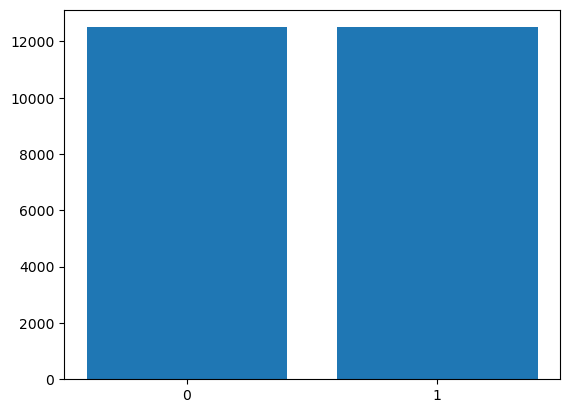

In [153]:
### TO BE COMPLETED ### 

# Proportion of positive reviews
label, freq = np.unique(y_train, return_counts=True)

plt.figure()
plt.bar(x = label, height = freq)
plt.xticks(label)
plt.show()

y_train distribution:  {0: 12500, 1: 12500}
y_test distribution:  {0: 12500, 1: 12500}


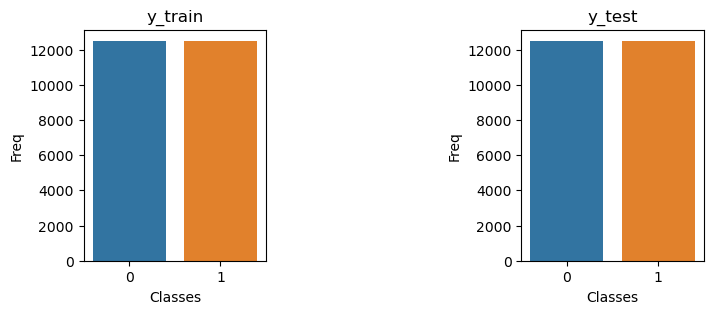

In [155]:
# %load solutions/imdb/positiveProportion.py
plt.figure(figsize = (8,3))

plt.subplot(1,3,1)
sns.countplot(x=y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("y_train")

plt.subplot(1,3,3)
sns.countplot(x=y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("y_test")


unique,  counts = np.unique(y_train, return_counts = True)
print("y_train distribution: ", dict(zip(unique,counts)))

unique,  counts = np.unique(y_test, return_counts = True)
print("y_test distribution: ", dict(zip(unique,counts)))

##### <span style="color:purple">**Question:** How many different words does this database contain?</span>

In [159]:
# %load solutions/imdb/vocab_size.py
# on prend tout le vocabulaire existant. X_train et X_test ne sont que des fractions de ce jeu de données de vocab
vocab_size = len(imdb.get_word_index()) 
print('%d unique words found' % vocab_size)  

88584 unique words found


##### <span style="color:purple">**Question:** Are all reviews the same length? If not, what is their maximum length?</span>

This question can be answered using an histogram.

In [161]:
np.shape(X_train[0])

(218,)

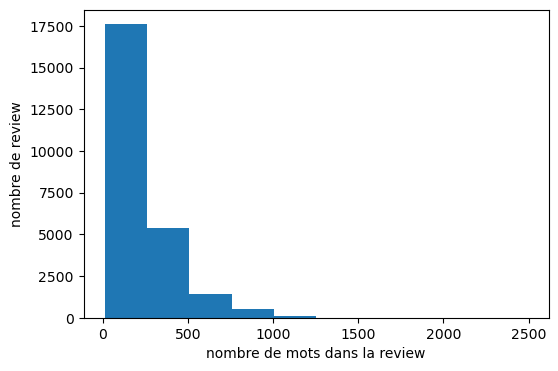

longueur maximale des reviews: 2494


In [171]:
### TO BE COMPLETED ### 

# Lengths of the reviews
len_review = []
for i in range(len(X_train)) : 
    len_review.append(len(X_train[i]))

plt.figure(figsize=(6,4))
plt.hist(len_review)
plt.xlabel("nombre de mots dans la review")
plt.ylabel("nombre de review")
plt.show()

print("longueur maximale des reviews:",np.max(len_review))

In [ ]:
# %load solutions/imdb/reviewsLengths.py

### Sequences Padding

The reviews have a variable number of words, while the network has a fixed number of neurons. To get a fixed length input, we can simply truncate the reviews to a fixed number of words, say $\texttt{max_words=200}$. To facilitate learning, we will also limit ourselves to the $\texttt{vocab_size=10000}$ most frequent words.

In [172]:
from tensorflow.keras.preprocessing import sequence

In [173]:
max_words = 200
vocab_size = 10000

(X_train, y_train), (X_test, y_test) = imdb.load_data(start_char=1, oov_char=2, index_from=3, num_words = vocab_size)

# X_train_pad = X_train où les review trop longues ont été tronquées à 200 mots 
# et où les reviews dont la taille est < 200 ont été étendues à une taille 200 
# en rajoutant des 0 (valeur 0 pour que ces chiffres ne soient pas pris en compte dans l'apprentissage)
X_train_pad = sequence.pad_sequences(X_train, value=0, padding='post', maxlen=max_words)
X_test_pad = sequence.pad_sequences(X_test, value=0, padding='post', maxlen=max_words)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/insa/anaconda/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/insa/anaconda/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

##### <span style="color:purple">**Todo:** Check that the size of the reviews is now equal to $\texttt{max_words}$ for each of them.</span>

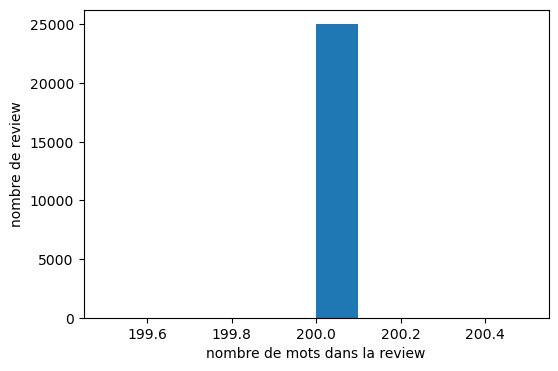

In [175]:
### TO BE COMPLETED ### 

# Lengths of the reviews
len_review = []
for i in range(len(X_train_pad)) : 
    len_review.append(len(X_train_pad[i]))

plt.figure(figsize=(6,4))
plt.hist(len_review)
plt.xlabel("nombre de mots dans la review")
plt.ylabel("nombre de review")
plt.show()

In [ ]:
# %load solutions/imdb/paddingLengths.py

Let us see the effect of padding and truncation at the most frequent words on the previously displayed idx-th review.

In [176]:
decodeReview(idx)

['[START]',
 'i',
 'remember',
 'first',
 'watching',
 'sabrina',
 'when',
 'it',
 'came',
 'to',
 'tv',
 'in',
 'the',
 'uk',
 'on',
 '[OOV]',
 'when',
 'i',
 'was',
 '13',
 '14',
 "i'm",
 'now',
 '24',
 'and',
 'still',
 'love',
 'it',
 'now',
 'as',
 'much',
 'as',
 'i',
 'did',
 'when',
 'i',
 'first',
 'watched',
 'it',
 'i',
 'get',
 'a',
 'little',
 'stick',
 'from',
 'some',
 'of',
 'my',
 'friends',
 'for',
 'still',
 'watching',
 'a',
 'kids',
 'show',
 'but',
 'i',
 "don't",
 'care',
 'lol',
 'caroline',
 '[OOV]',
 'as',
 '[OOV]',
 'is',
 'my',
 'personal',
 'favourite',
 'character',
 'and',
 'later',
 'on',
 'morgan',
 'also',
 'became',
 'another',
 'of',
 'my',
 'favourite',
 'characters',
 'i',
 'remember',
 'spending',
 'so',
 'much',
 'time',
 'watching',
 'various',
 'special',
 'events',
 '[OOV]',
 'sabrina',
 'on',
 'the',
 'tv',
 'station',
 '[OOV]',
 'uk',
 'i',
 'love',
 '[OOV]',
 'joan',
 'hart',
 'she',
 'was',
 'great',
 'in',
 '[OOV]',
 'explains',
 'all',
 

## RNN for Sentiment Analysis

In [177]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, SimpleRNN, LSTM, Dense, Dropout, Bidirectional

##### <span style="color:purple">**Todo:** Design a RNN model for sentiment analysis.</span>

The first layer must be an [`Embedding`](https://keras.io/api/layers/core_layers/embedding/) layer. To prevent gradient vanishing, choose a suitable recurrent network.

In [178]:
### TO BE COMPLETED ### 
embedding_size = 32

rnn = Sequential(name="RNN")
rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
[...]

print(rnn.summary())

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           320000    
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________
None


2022-11-28 11:53:57.631083: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-28 11:53:57.633870: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 11:53:57.637737: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [180]:
# %load solutions/imdb/rnn.py
embedding_size = 32

rnn = Sequential(name="RNN")
rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
rnn.add(LSTM(int(.5*embedding_size)))
rnn.add(Dropout(0.1))
rnn.add(Dense(1, activation='sigmoid'))

print(rnn.summary())

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

##### <span style="color:purple">**Todo:** Performing the learning.</span>

In [ ]:
### TO BE COMPLETED ### 

batch_size = 100
num_epochs = 8

X_valid, y_valid = X_train_pad[:batch_size], y_train_pad[:batch_size]
X_train_rnn, y_train_rnn = X_train_pad[batch_size:], y_train_pad[batch_size:]


rnn.compile(loss=..., 
             optimizer=..., 
             metrics=['accuracy'])

history_rnn = rnn.fit(...)

In [ ]:
# %load solutions/imdb/rnnTraining.py

##### <span style="color:purple">**Todo:** Visualize the learning process.</span>

Write a function that allows to represent on two different figures the accuracy on one hand, and the loss on the other hand, each for the training and test data.

In [ ]:
### TO BE COMPLETED ### 

def plotTraining(history):
    [...]

In [ ]:
# %load solutions/imdb/plotTraining.py

In [ ]:
plotTraining(history_rnn)

## Bidirectional RNN

As defined, this network introduces a causal structure into the data. Also, for text processing, we often prefer a bidirectional network. To do this, we can use the [`Bidirectional`](https://keras.io/api/layers/recurrent_layers/bidirectional/) command.

In [ ]:
embedding_size = 32

bi_rnn = Sequential(name="Bidirectional_RNN")
bi_rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
bi_rnn.add(Bidirectional(LSTM(int(.5*embedding_size))))  ### NEW ###
bi_rnn.add(Dropout(0.1))
bi_rnn.add(Dense(1, activation='sigmoid'))

print(bi_rnn.summary())

In [ ]:
batch_size = 100
num_epochs = 8

X_valid, y_valid = X_train_pad[:batch_size], y_train[:batch_size]
X_train_rnn, y_train_rnn = X_train_pad[batch_size:], y_train[batch_size:]


bi_rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

history_bi_rnn = bi_rnn.fit(X_train_rnn, 
                    y_train_rnn, 
                    validation_data=(X_valid, y_valid), 
                    batch_size=batch_size, 
                    epochs=num_epochs)

plotTraining(history_bi_rnn)

Thanks to the $\texttt{return_sequences}$ option, we can easily stack several RNN.

In [ ]:
embedding_size = 32

bi2_rnn = Sequential(name="Double_Bidirectional_RNN")
bi2_rnn.add(Embedding(vocab_size, embedding_size, input_length=max_words))
bi2_rnn.add(Bidirectional(LSTM(int(.5*embedding_size), return_sequences = True)))
bi2_rnn.add(Bidirectional(LSTM(int(.5*embedding_size), return_sequences = False)))
bi2_rnn.add(Dropout(0.1))
bi2_rnn.add(Dense(1, activation='sigmoid'))

print(bi2_rnn.summary())

In [ ]:
batch_size = 100
num_epochs = 8

X_valid, y_valid = X_train_pad[:batch_size], y_train[:batch_size]
X_train_rnn, y_train_rnn = X_train_pad[batch_size:], y_train[batch_size:]


bi2_rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

history_bi2_rnn = bi2_rnn.fit(X_train_rnn, 
                    y_train_rnn, 
                    validation_data=(X_valid, y_valid), 
                    batch_size=batch_size, 
                    epochs=num_epochs)

plotTraining(history_bi2_rnn)

## Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix

##### <span style="color:purple">**Todo:** Compare the confusion matrices for the three models proposed above.</span>

In [ ]:
### TO BE COMPLETED ### 

# Compare the confusion matrices

In [ ]:
# %load solutions/imdb/confusion.py

## MLP for Sentiment Analysis

Just to be sure of the usefulness of a recurrent network, we decide to test a "simple" perceptron on the IMDB dataset.

##### <span style="color:purple">**Todo:** Compare the above results with those of an MLP. Conclude.</span>

In [ ]:
### TO BE COMPLETED ### 

# Comparison with a MLP

In [ ]:
# %load solutions/imdb/mlp.py